# 90년대 이전 자료 활용 Pandas Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from collections import Counter

plt.rc('font', family='Malgun Gothic')
font_path = r"C:/windows/fonts/malgun.ttf"

In [2]:
file_path = "../data/"
fn= 'epic_data.xlsx'

raw_df = pd.read_excel(file_path+fn)

## EPIC 모든 데이터

In [4]:
raw_df

,Unnamed: 0,No,자료명,발간일,발간처,요약
0,0,1,'96년에 달라지는 양도세 및 상속세 주요내용,1996.01.01,재정경제원 세제실 재산세제과,"'96년부터 달라지는 양도세,상속세 주요내용\nⅠ. 양도세관련 개정내용\n1. 양도..."
1,1,2,'96년에 달라지는 교육세등 주요내용,1996.01.04,재정경제원 세제실 기본법규과,"'96년부터 달라지는 교육세법,세무사법,농어촌특별세법 주요내용\nⅠ. 교육세법\n1..."
2,2,3,'96년에 달라지는 소비세 주요내용,1996.01.03,재정경제원 세제실 소비세제과,"'96년부터 달라지는 부가가치세법,특별소비세법.교통세법,주세법 주요내용\nⅠ. 부가..."
3,3,4,우리국민이 꼭 알아야 할 외환상식,1996.01.04,재정경제원 금융정책실 국제금융담당관실,재정경제원이 해외여행 자유화 증대에 따라 마련한 국민이 알아야 할 외환상식 주요내용...
4,4,5,'95 부가가치세법시행규칙 개정,1996.01.03,재정경제원 세제실 소비세제과,시이상지역 소재 농.축협에서 판매하는 축협사료의 면세기한 연장 등을 주요 골자로 한...
...,...,...,...,...,...,...
244272,244272,259058,"칭찬과 소통, 일·가정 양립으로 도약하는 행정안전부 조직문화",2024.11.01,행정안전부 기획조정실 미래전략담당관,"행정안전부는 매달 우수한 성과를 달성하거나, 조직 화합 등에서 귀감이 되는 직원을 ..."
244273,244273,259059,국제기구와 기업 등과 함께 ‘더 나은 삶을 위한 디지털 전환’ 방안 논의,2024.10.31,기획재정부 대외경제국 경제협력기획과,"기획재정부는 10월 31일(목), 서울 홍릉에 위치한 글로벌지식협력단지에서 ‘더 나..."
244274,244274,259060,마약류 셀프처방 금지 대상 ‘프로포폴’ 지정 추진,2024.10.31,식품의약품안전처 의약품안전국 마약안전기획관 마약정책과,식품의약품안전처는 마약류취급의료업자가 자신에게 ‘프로포폴’(마취제)을 처방하거나 투...
244275,244275,259061,"맞춤형 특허 전략으로 창업초기기업 경쟁력 업! 특허청, 지식재산(IP) 기반 창업기...",2024.10.30,특허청,특허청은 10.30.(수) 16시 30분 착용형 로봇 제조 기업인 ㈜휴로틱스를 방문...


### 다듬기

In [6]:
df = raw_df[['No','발간처','자료명', '발간일','요약']].sort_values('발간일').reset_index(drop=True)

# 날짜 형식을 datetime 형식으로 변환하는 함수
def convert_to_datetime(date_str):
    # 'yyyy.mm.' 형식인 경우
    if len(date_str) == 8 and date_str[-1] == '.':
        date_str += '01'
    # 'yyyy.mm.dd' 형식이 아니거나, 잘못된 형식인 경우 None 반환
    elif len(date_str) != 10 or not date_str.replace('.', '').isdigit():
        return None
    
    # 유효하지 않은 일자 확인 및 수정
    try:
        date = pd.to_datetime(date_str, format='%Y.%m.%d', errors='raise')
        # 유효하지 않은 월이나 일을 가진 경우 None 반환
        if date.month == 0 or date.day == 0:
            return None
    except ValueError:
        # 잘못된 날짜는 'yyyy.mm.01'로 수정
        date_str = date_str[:8] + '01'
        try:
            date = pd.to_datetime(date_str, format='%Y.%m.%d')
        except ValueError:
            return None
    return date
    
# '발간일' 컬럼을 datetime 형식으로 변환
df['발간일'] = df['발간일'].apply(convert_to_datetime)

In [7]:
df

,No,발간처,자료명,발간일,요약
0,255306,교통부,철도건설계획,1948-12-01,교통부는 철도건설계획 중 철도건설비 특별예산 요구서를 1948.12 작성하였다.\n...
1,257749,국무총리 비서실,양곡 직장 및 세궁민 배급제에 대한 국무총리 담화,1949-01-01,국무총리 비서실은 ‘양곡 직장 및 세궁민 배급제에 대한 국무총리 담화’를 1949....
2,255341,법제처,인구조사법,1949-01-27,대통령은 국회의 의결로 확정된 ‘인구조사법’을 1949.1.27 공포하였다.\n\n...
3,255495,기획처,농지개혁법(안) 설명서,1949-02-01,기획처는 ‘농지개혁법(안) 설명서’를 1949.2 작성하였다.\n\n- 농업경제에 ...
4,255309,법제처,한일통상 요강,1949-02-15,법제처는 ‘한일통상 요강’을 국무회의 안건으로 1949.2.15 상정하였다.\n\n...
...,...,...,...,...,...
244272,259026,산업통상자원부 산업정책실 제조산업정책관 엔지니어링디자인과,"인공지능(AI) 날개 단 K-디자인, 글로벌 기업으로 점프업",2024-11-01,"산업통상자원부와 한국디자인진흥원은 10.31.(목), 한국디자인진흥원에서 「제2차 ..."
244273,259031,행정안전부 균형발전지원국 지역청년정책과,집 걱정 없이 영덕에서 꿈을 펼치세요,2024-11-01,행정안전부는 도시 청년의 지역 정착과 지역살이 체험을 지원하는 ‘영덕군 청년마을 공...
244274,259030,농림축산식품부 식량정책실 식량정책관 전략작물육성팀,동네 빵집에서 20% 할인된 가격으로 가루쌀빵 드셔보세요,2024-11-01,농림축산식품부는 가루쌀 제품 수요 촉진을 위해 「가루쌀빵 할인행사(부제 : Have...
244275,258974,과학기술정보통신부 양자과학기술산업반 양자과학기술산업과,「양자과학기술 및 양자산업 육성에 관한 법」 시행!,2024-11-01,과학기술정보통신부는 「양자과학기술 및 양자산업 육성에 관한 법」이 11월 1일(금)...


## 판다스 연습: 새로운 컬럼 만들기

- URL을 만들어보자
- URL 구조: "https://eiec.kdi.re.kr/policy/materialView.do?num={}"

In [22]:
df['URL'] = df['No'].apply(lambda x: f"eiec.kdi.re.kr/policy/materialView.do?num={x}")

In [23]:
df

,No,URL,발간일,발간처,자료명,요약
0,255306,eiec.kdi.re.kr/policy/materialView.do?num=255306,1948-12-01,교통부,철도건설계획,교통부는 철도건설계획 중 철도건설비 특별예산 요구서를 1948.12 작성하였다.\n...
1,257749,eiec.kdi.re.kr/policy/materialView.do?num=257749,1949-01-01,국무총리 비서실,양곡 직장 및 세궁민 배급제에 대한 국무총리 담화,국무총리 비서실은 ‘양곡 직장 및 세궁민 배급제에 대한 국무총리 담화’를 1949....
2,255341,eiec.kdi.re.kr/policy/materialView.do?num=255341,1949-01-27,법제처,인구조사법,대통령은 국회의 의결로 확정된 ‘인구조사법’을 1949.1.27 공포하였다.\n\n...
3,255495,eiec.kdi.re.kr/policy/materialView.do?num=255495,1949-02-01,기획처,농지개혁법(안) 설명서,기획처는 ‘농지개혁법(안) 설명서’를 1949.2 작성하였다.\n\n- 농업경제에 ...
4,255309,eiec.kdi.re.kr/policy/materialView.do?num=255309,1949-02-15,법제처,한일통상 요강,법제처는 ‘한일통상 요강’을 국무회의 안건으로 1949.2.15 상정하였다.\n\n...
...,...,...,...,...,...,...
244272,259026,eiec.kdi.re.kr/policy/materialView.do?num=259026,2024-11-01,산업통상자원부 산업정책실 제조산업정책관 엔지니어링디자인과,"인공지능(AI) 날개 단 K-디자인, 글로벌 기업으로 점프업","산업통상자원부와 한국디자인진흥원은 10.31.(목), 한국디자인진흥원에서 「제2차 ..."
244273,259031,eiec.kdi.re.kr/policy/materialView.do?num=259031,2024-11-01,행정안전부 균형발전지원국 지역청년정책과,집 걱정 없이 영덕에서 꿈을 펼치세요,행정안전부는 도시 청년의 지역 정착과 지역살이 체험을 지원하는 ‘영덕군 청년마을 공...
244274,259030,eiec.kdi.re.kr/policy/materialView.do?num=259030,2024-11-01,농림축산식품부 식량정책실 식량정책관 전략작물육성팀,동네 빵집에서 20% 할인된 가격으로 가루쌀빵 드셔보세요,농림축산식품부는 가루쌀 제품 수요 촉진을 위해 「가루쌀빵 할인행사(부제 : Have...
244275,258974,eiec.kdi.re.kr/policy/materialView.do?num=258974,2024-11-01,과학기술정보통신부 양자과학기술산업반 양자과학기술산업과,「양자과학기술 및 양자산업 육성에 관한 법」 시행!,과학기술정보통신부는 「양자과학기술 및 양자산업 육성에 관한 법」이 11월 1일(금)...


In [24]:
columns_order = ['URL', '발간일', '자료명']
df_show = df[columns_order]

In [26]:
df_show

,URL,발간일,자료명
0,eiec.kdi.re.kr/policy/materialView.do?num=255306,1948-12-01,철도건설계획
1,eiec.kdi.re.kr/policy/materialView.do?num=257749,1949-01-01,양곡 직장 및 세궁민 배급제에 대한 국무총리 담화
2,eiec.kdi.re.kr/policy/materialView.do?num=255341,1949-01-27,인구조사법
3,eiec.kdi.re.kr/policy/materialView.do?num=255495,1949-02-01,농지개혁법(안) 설명서
4,eiec.kdi.re.kr/policy/materialView.do?num=255309,1949-02-15,한일통상 요강
...,...,...,...
244272,eiec.kdi.re.kr/policy/materialView.do?num=259026,2024-11-01,"인공지능(AI) 날개 단 K-디자인, 글로벌 기업으로 점프업"
244273,eiec.kdi.re.kr/policy/materialView.do?num=259031,2024-11-01,집 걱정 없이 영덕에서 꿈을 펼치세요
244274,eiec.kdi.re.kr/policy/materialView.do?num=259030,2024-11-01,동네 빵집에서 20% 할인된 가격으로 가루쌀빵 드셔보세요
244275,eiec.kdi.re.kr/policy/materialView.do?num=258974,2024-11-01,「양자과학기술 및 양자산업 육성에 관한 법」 시행!


## 90년대 이전자료만 보자

In [28]:
specific_date = pd.to_datetime('1990-01-01')

filtered_df = df[df['발간일'] < specific_date]

## 연도별 자료 개수

In [32]:
yearly_counts = filtered_df['발간일'].dt.year.value_counts().sort_index()

In [33]:
yearly_counts

발간일
1948      1
1949     13
1950     12
1951      8
1952     12
1953     15
1954     14
1955      7
1956     21
1957     13
1958     13
1959     18
1960     21
1961     44
1962     68
1963     43
1964     76
1965     91
1966    100
1967     88
1968     96
1969    116
1970     52
1971     87
1972     51
1973     56
1974     41
1975     23
1976     27
1977     14
1978      3
1979      4
1980     11
1981     63
1982     61
1983     35
1984     29
1985     31
1986     46
1987     62
1988     39
1989     56
Name: count, dtype: int64

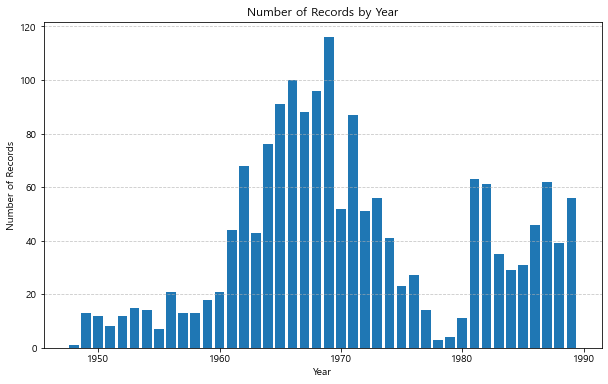

In [34]:
# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.title('Number of Records by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 연도별 Wordcloud

In [82]:
# 요약 빈 것 삭제
filtered_df = filtered_df.dropna(subset=['요약'])
filtered_df = filtered_df[filtered_df['요약'].str.strip() != ""]

In [83]:
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Mecab
tagger = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")

In [166]:
stop_words = "안 간 붙임 참고 별첨 차 참조 첨부 관련 총리 보고 조치 으로 제출 장관 겸 청 실 는 은 을 를 가 등 원 조 개 이 저 부 다만 하지만 그러나 중 억 년 월 화 수 목 금 토 일 것 줄 만 건 또한 아울러 그리고 전년 금년 이번 올해 내년 기획 재정부 첨부 파일 내용 발표 위원회 감독원"
stop_words = stop_words.split(" ")

In [167]:
excluson = ["농림부","정부",'대통령','경제기획원','상공부','국가기록원','출처','시행','대책','회의','공포','경제','사업','국무','실시','체결','의결','종합','주요','한국','대한민국'
            '계획임.','예정임.','밝혔다.','발표하였다.', '법', '안건', '문서', '계획','자료','추진','협정']

In [168]:
def df_to_wordcloud(df, name, yyyy):
    summary_list = df['요약'].tolist()
    
    nouns = []
    for summary in summary_list:
        # 뺄 단어 빼기
        for ex in excluson:
            summary = summary.replace(ex,'')
        for noun in tagger.nouns(summary):
            if noun not in stop_words:
                nouns.append(noun)
    
    nouns_counter = Counter(nouns)
    top_nouns = dict(nouns_counter.most_common(100))
    
    wc = WordCloud(background_color='white', font_path=font_path)
    wc.generate_from_frequencies(top_nouns)
    
    figure = plt.figure()
    
    ax = figure.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(wc)
    
    plt.title(f"{name} {yyyy}")
    plt.axis('off')
    plt.show()

In [169]:
filtered_data_by_decade = {
    "1950s": filtered_df[(filtered_df['발간일'].dt.year >= 1950) & (filtered_df['발간일'].dt.year < 1960)],
    "1960s": filtered_df[(filtered_df['발간일'].dt.year >= 1960) & (filtered_df['발간일'].dt.year < 1970)],
    "1970s": filtered_df[(filtered_df['발간일'].dt.year >= 1970) & (filtered_df['발간일'].dt.year < 1980)],
    "1980s": filtered_df[(filtered_df['발간일'].dt.year >= 1980) & (filtered_df['발간일'].dt.year < 1990)]
}

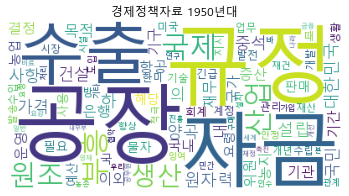

In [170]:
df_to_wordcloud(filtered_data_by_decade["1950s"], name, '1950년대')

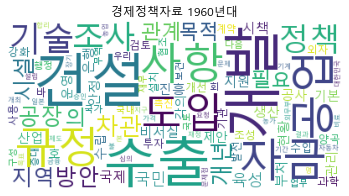

In [171]:
df_to_wordcloud(filtered_data_by_decade["1960s"], name, '1960년대')

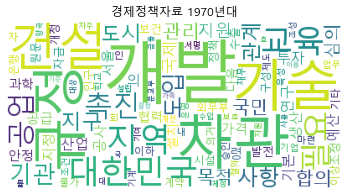

In [172]:
df_to_wordcloud(filtered_data_by_decade["1970s"], name, '1970년대')

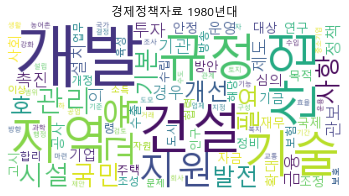

In [173]:
df_to_wordcloud(filtered_data_by_decade["1980s"], name, '1980년대')